**First**, click the file folder icon on the left and upload the abalone.data file. Then run the function defined all the way at the bottom. Then you should be able to run any relevent sections to reproduce results.

In [ ]:
from sklearn import tree
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix


In [ ]:
data = pd.read_csv("abalone.data",sep=",")
param_dict = {"criterion":["gini","entropy"],"max_depth":range(3,25),"min_samples_split":range(1,5),"min_samples_leaf":range(1,50)}
#data = data.drop(columns="density")
#data


In [ ]:
data = data.drop(columns="Sex")

KeyError: ignored

In [ ]:
data

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


Decision Tree. 

In [ ]:
y = data.iloc[:,7].to_numpy()


x = data.iloc[:,:7].to_numpy()

In [ ]:



for i in range(1,9):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=i/10, random_state=42)
  clf = tree.DecisionTreeClassifier()
  clf = clf.fit(x_train, y_train)
  predicts = clf.predict(x_test)
  print("Test Set at " + str(i))
  print(metrics.accuracy_score(y_test,predicts))
  predicts = clf.predict(x_train)
  print("Train set at " + str(i))
  print(metrics.accuracy_score(y_train,predicts))
  


Test Set at 1
0.23923444976076555
Train set at 1
1.0
Test Set at 2
0.21889952153110048
Train set at 2
1.0
Test Set at 3
0.20175438596491227
Train set at 3
1.0
Test Set at 4
0.2094554159186116
Train set at 4
1.0
Test Set at 5
0.18334131163235998
Train set at 5
1.0
Test Set at 6
0.20023932987634624
Train set at 6
1.0
Test Set at 7
0.19425444596443228
Train set at 7
1.0
Test Set at 8
0.1971873129862358
Train set at 8
1.0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.1, random_state=42)
grid = GridSearchCV(clf,param_grid=param_dict,cv=10,verbose=1,n_jobs=-1)
grid.fit(x_train,y_train)


Fitting 10 folds for each of 8624 candidates, totalling 86240 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 390 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 2790 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 6790 tasks      | elapsed:   42.9s
[Parallel(n_jobs=-1)]: Done 12390 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 19590 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 28390 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 38790 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 50790 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 54454 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 58254 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 62454 tasks      | elapsed: 15.0min
[Pa

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                    

In [ ]:
grid.best_params_


{'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_leaf': 44,
 'min_samples_split': 2}

1
0.2834928229665072
[[ 2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  9  2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1 10  6 13  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  5 20 15  4  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  1 15 36 17 11  2  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  1  1 12 42 23 13  2  1  3  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2 14 27 43 41  6  6  3  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  9 21 34 49 10  9  7  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  5  4 24 32 18  5  3  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  5  7 20  8  6  3  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  1  2  5  8  6  2  5  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  7  6  1  5  7  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  4  6  1  3  6  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  7  1  1  2  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  3  2  2  0  0  0  0  0  0  0  0

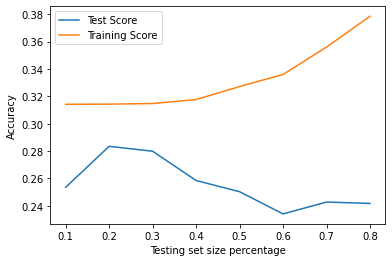

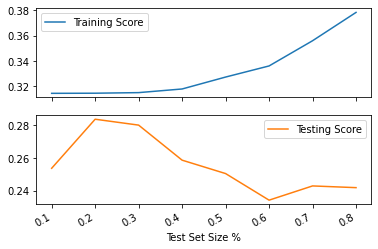

In [ ]:
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=6,min_samples_leaf=5,min_samples_split=2)

generateStats(clf,x,y)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.1, random_state=42)
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=20,min_samples_leaf=1,min_samples_split=2)
clf = clf.fit(x_train, y_train)
predicts = clf.predict(x_test)
print(metrics.accuracy_score(y_test,predicts))
print(confusion_matrix(y_test,predicts))
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
predicts = clf.predict(x_test)
print(metrics.accuracy_score(y_test,predicts))

0.636734693877551
[[  0   0   0   3   0   0]
 [  1   5   8   4   0   0]
 [  0   5  96  36   5   2]
 [  0   2  36 151  20   6]
 [  1   2   5  29  53   4]
 [  0   0   0   3   6   7]]
0.6163265306122448


Loop through multiple values for min_samples_leaf and record accuracy scores on training and test data for learning rates, then graph it.

In [ ]:
learningrate = pd.DataFrame(np.array(range(1,9)),columns=["Test Set Size %"])



,Test Set Size %
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8


In [ ]:
results = np.zeros((2,8))
for i in range(1,9):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=i/10, random_state=42)
  clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=20,min_samples_leaf=1,min_samples_split=2)
  clf = clf.fit(x_train, y_train)
  predicts = clf.predict(x_test)
  
  results[1][i-1] = (metrics.accuracy_score(y_test,predicts))
  predicts = clf.predict(x_train)
  
  results[0][i-1] = (metrics.accuracy_score(y_train,predicts))

#print(results)
learningrate['Training Score'] = results[0]
learningrate['Testing Score'] = results[1]
print(clf.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 20, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}


In [ ]:
learningrate['Test Set Size %'] = learningrate['Test Set Size %']*.1
learningrate

,Test Set Size %,Training Score,Testing Score
0,0.1,0.994328,0.634694
1,0.2,0.993364,0.591837
2,0.3,0.998833,0.593878
3,0.4,0.979918,0.576531
4,0.5,0.998775,0.547162
5,0.6,0.993874,0.518203
6,0.7,0.991831,0.495188
7,0.8,1.000000,0.472314


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff6261b8550>,
      dtype=object)

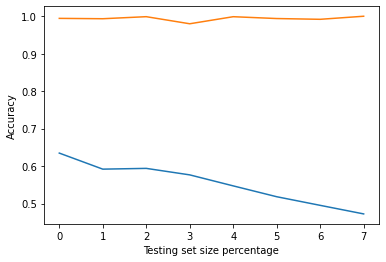

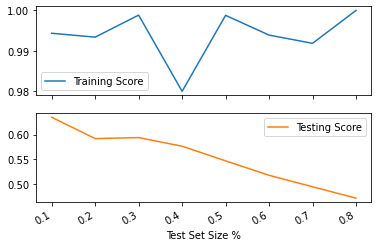

In [ ]:


plt.plot(learningrate['Testing Score'])
plt.plot(learningrate['Training Score'])
plt.ylabel('Accuracy')
plt.xlabel("Testing set size percentage")
learningrate.plot(x='Test Set Size %',subplots=True)


Neural Nets:

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler 
param_dict = {'alpha':10.0 ** -np.arange(2, 6),'hidden_layer_sizes': range(5,10)}

In [ ]:
scaler = StandardScaler()
scaler.fit(x_train)  
X_train = scaler.transform(x_train)  
X_test = scaler.transform(x_test) 

In [ ]:

 
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(12,2), random_state=1)

clf.fit(X_train, y_train)
grid = GridSearchCV(clf,param_grid=param_dict,cv=10,verbose=1,n_jobs=-1)
grid.fit(X_train,y_train)




Fitting 10 folds for each of 20 candidates, totalling 200 fits


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   42.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  3.1min finished
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: Converg

GridSearchCV(cv=10, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=1e-05,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(12, 2),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=1, shuffle=True,
                                     solver='lbfgs', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'a

In [ ]:
grid.best_params_

{'alpha': 1e-05, 'hidden_layer_sizes': 7}

In [ ]:
predicts = clf.predict(X_test)
print(metrics.accuracy_score(y_test,predicts))
confusion_matrix(y_test,predicts)


clf = MLPClassifier(solver='lbfgs', alpha=1e-05,hidden_layer_sizes=7, random_state=1,max_iter=5000)
clf.fit(X_train, y_train)
predicts = clf.predict(X_test)
print(metrics.accuracy_score(y_test,predicts))



0.291866028708134
0.291866028708134


3
0.2956313584679832
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  1   0   3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0  14   6   4   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0  14  11  30   4   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   1   9  38  30  18   0   2   1   0   0   0   0   2   0   0   0
    0   0   0   0   0]
 [  0   0   1   3  32  62  59  14   6   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   1   1  11  17 102  44  31   5   0   2   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   2  24  62  88  82  18   0   4   0   0   1   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   3   7  45  42 105  35   2  13   2   1   1   0   0   1
    0   0   0   0   0]
 [  0   0   0   0   3   4  11  26  79  54   0   9   2   0   1   0   0   0
    0   0   0   0   0]
 [  0   0

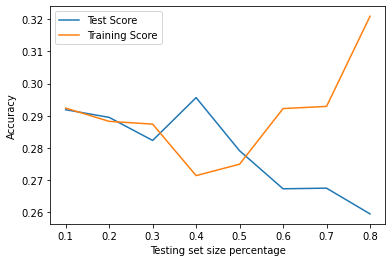

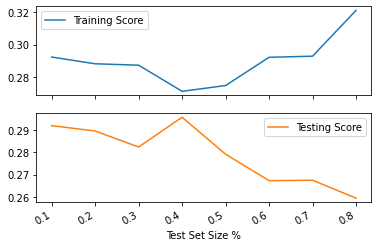

In [ ]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-05,hidden_layer_sizes=7, random_state=1,max_iter=5000)
generateStats(clf,x,y,ann=True)

KNN model


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

In [ ]:
scores = np.zeros(20)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.1, random_state=42)

In [ ]:
for i in range(1,20):
  print(i)
  neigh = KNeighborsClassifier(n_neighbors=i)
  neigh.fit(x_train, y_train)
  predicts = neigh.predict(x_test)
  scores[i] = (metrics.accuracy_score(y_test,predicts))
print(scores.argmax())


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
17


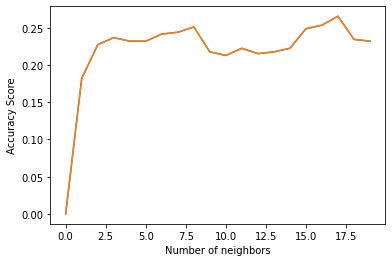

In [ ]:
plt.plot(scores)
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy Score")
plt.plot(scores)

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=17, leaf_size=100)
neigh.fit(x_train, y_train)
predicts = neigh.predict(x_test)
print(metrics.accuracy_score(y_test,predicts))


0.26555023923444976


0
0.26555023923444976
[[ 0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  4  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  9  4  2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1 11  7  4  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  8 17 13  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  1  5 20 21  4  2  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  6 21 20 16  3  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  8 22 20 13  0  1  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3 11  7 12  1  1  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  3 10  9  1  3  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  2  4  6  7  1  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  8  2  1  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  4  3  2  0  3  0  1  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  2  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  1  2  0  0  0  0  0  0  0  0  

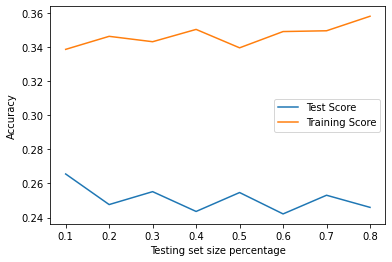

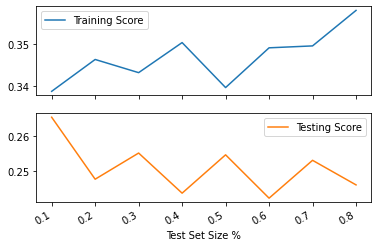

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=17)
generateStats(neigh,x,y)

Boosting


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

In [ ]:
param_dict = {"n_estimators":range(30,150,10),"learning_rate":np.arange(1,10)*.1}

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.1, random_state=42)
clf = AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=2),n_estimators=100, random_state=0)
grid = GridSearchCV(clf,param_grid=param_dict,cv=5,verbose=1,n_jobs=-1)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   27.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  6.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                class_weight=None,
                                                                                criterion='gini',
                                                                                max_depth=2,
                                                                                max_features=None,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                                                                min_samples_leaf=1,
    

In [ ]:
grid.best_params_

{'learning_rate': 0.1, 'n_estimators': 50}

In [ ]:
clf = AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=2),learning_rate = 0.1, n_estimators=50, random_state=0)
clf.fit(x_train, y_train)
predicts = clf.predict(x_test)
print(metrics.accuracy_score(y_test,predicts))


0.23205741626794257


0
0.23205741626794257
[[ 0  2  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  3  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1 14  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 14  4  4  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 14 10  6  6  6  2  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  5 16 18  7  4  3  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  4  4  5 18 21 12  3  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  1  1 22 26 11  1  3  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  9 12  9  4  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  6  9  5  2  2  0  1  1  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  1  2 11  5  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  3  6  1  2  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  8  1  0  2  1  1  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  1  0  0  2  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  2  1  0  0  0  0  0  0  0  

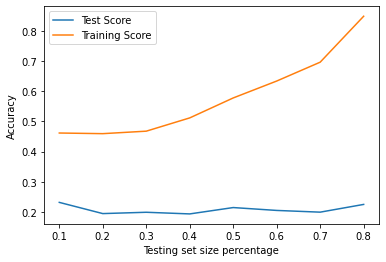

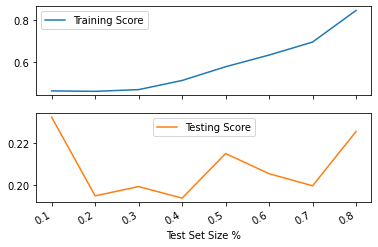

In [ ]:
clf = AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=5),learning_rate = 0.3, n_estimators=50, random_state=0)
generateStats(clf,x,y,ann=True)

Support Vector Machine

In [ ]:
from sklearn import svm

In [ ]:
param_dict = {"kernal":["linear", "poly", "rbf", "sigmoid", "precomputed"],}

2
0.24880382775119617
[[  0   3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0  12   3   3   1   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0  11   9  19   6   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   1   2  20  26  13  14   1   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0  14  45  21  49   0   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0   4  10  12 137   1   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0   2  14  11 178   6   1   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0   0   8   3 150  21   8   0   0   0   1   0   0   0   0   0
    0   0   0]
 [  0   0   0   2   1   6  92  23  13   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0   0   2   1  61  12   6   1   1   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0   1   2   0  35  11   4   0   0   0   0   0   0   0   0   0
    0   0   0]

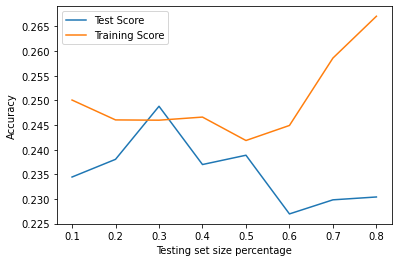

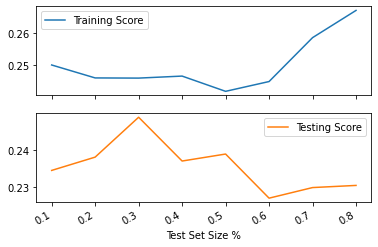

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.1, random_state=42)
clf = svm.SVC(kernel="poly",degree=3)
generateStats(clf,x,y,ann=True)


1
0.30023923444976075
[[ 0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  9  3  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  8  8 13  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3 16 20  7  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 10 36 26 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  3 10 43 35  7  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2 12 27 59 38  4  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  7 22 40 51 18  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  3  7 22 31 28  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  4 13 19 13  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  1  4  8  9  8  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2 12  7  4  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  7 12  2  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  8  3  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  3  4  0  0  0  0  0  0  0  0  

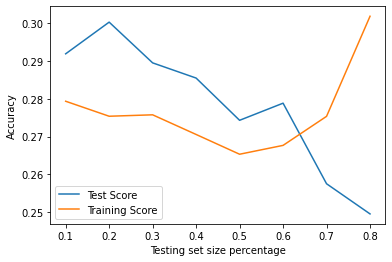

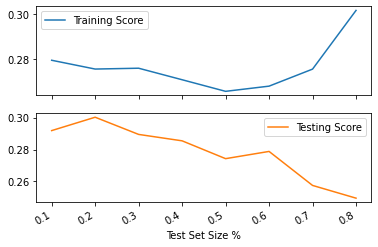

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.1, random_state=42)
clf = svm.SVC(kernel="rbf",gamma=.1)
generateStats(clf,x,y,ann=True)

In [ ]:
def generateStats(classifier, x, y, ann = False):
  learningrate = pd.DataFrame(np.array(range(1,9)),columns=["Test Set Size %"])
  results = np.zeros((2,8))
  for i in range(1,9):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=i/10, random_state=42)
    #clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=20,min_samples_leaf=1,min_samples_split=2)
    if ann == True:
      scaler = StandardScaler()
      scaler.fit(x_train)  
      x_train = scaler.transform(x_train)  
      x_test = scaler.transform(x_test) 
    classifier1 = classifier.fit(x_train, y_train)
    predicts = classifier1.predict(x_test)
    
    results[1][i-1] = (metrics.accuracy_score(y_test,predicts))
    predicts = classifier1.predict(x_train)
    
    results[0][i-1] = (metrics.accuracy_score(y_train,predicts))

  #print(results)
  learningrate['Training Score'] = results[0]
  learningrate['Testing Score'] = results[1]
  #print(clf.get_params())
  learningrate['Test Set Size %'] = learningrate['Test Set Size %']*.1
  plt.plot(learningrate['Test Set Size %'],learningrate['Testing Score'],label='Test Score')
  plt.plot(learningrate['Test Set Size %'],learningrate['Training Score'],label='Training Score')
  plt.ylabel('Accuracy')
  plt.xlabel("Testing set size percentage")
  plt.legend()
  learningrate.plot(x='Test Set Size %',subplots=True)
  best = np.array(learningrate['Testing Score']).argmax()
  print(best)
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=(best+1)/10, random_state=42)
  if ann == True:
      scaler = StandardScaler()
      scaler.fit(x_train)  
      x_train = scaler.transform(x_train)  
      x_test = scaler.transform(x_test)
  clf = classifier.fit(x_train,y_train)
  predicts = clf.predict(x_test)
  print(metrics.accuracy_score(y_test,predicts))
  print(confusion_matrix(y_test,predicts))
  